In [3]:
import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt

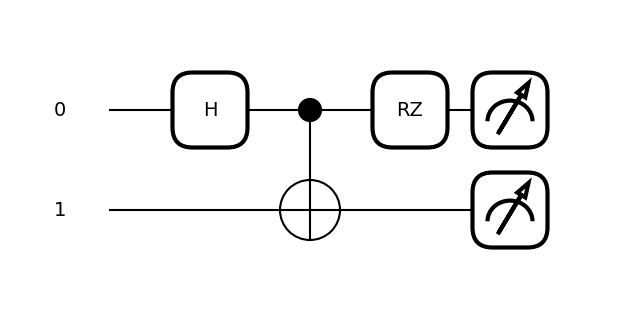

In [6]:
def my_first_circuit(theta):

    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.RZ(theta, wires = 0)

    return qml.probs(wires = [0,1])

fig, ax = qml.draw_mpl(my_first_circuit)(20)
plt.show()

# I 2.1

**Order of operations**

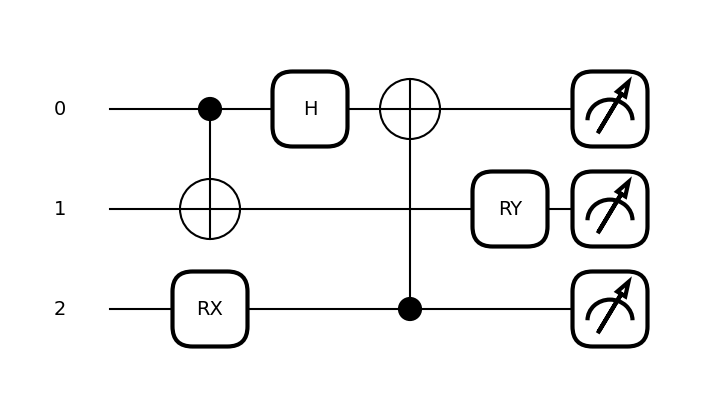

In [7]:
def my_circuit(theta, phi):
    qml.CNOT(wires=[0, 1])

    qml.RX(theta, wires=2)

    qml.Hadamard(wires=0)
    
    qml.CNOT(wires=[2, 0])
    
    qml.RY(phi, wires=1)

    return qml.probs(wires=[0, 1, 2])# This is the measurement; we return the probabilities of all possible output states

fig,ax = qml.draw_mpl(my_circuit)(20,20)
plt.show()
    

# I 2.2

**Building a QNode**

In [11]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):


    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    
    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

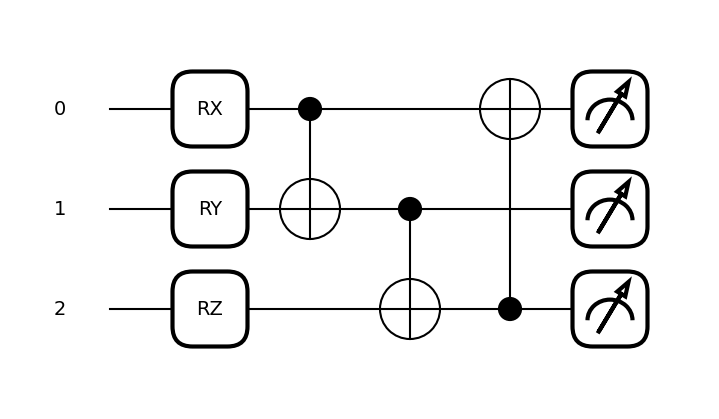

In [12]:
fig,ax = qml.draw_mpl(my_qnode)(theta,phi,omega)

# I 2.3

The Qnode decorator 

In [17]:
dev = qml.device("default.qubit", wires=3)
# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3


# RUN THE QNODE WITH THE PROVIDED PARAMETERS
my_circuit(theta,phi,omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

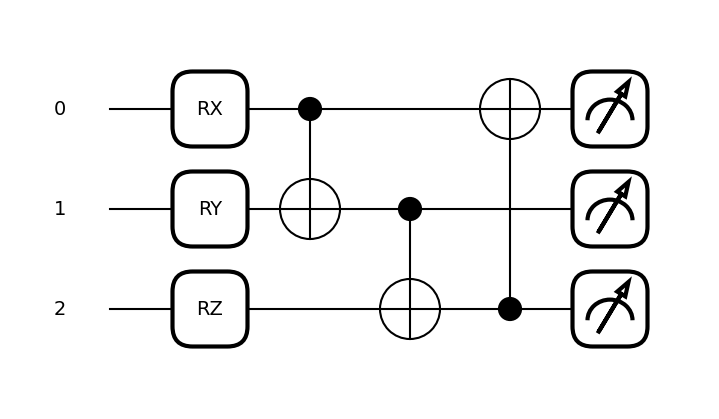

In [18]:
fig, ax = qml.draw_mpl(my_circuit)(theta, phi, omega)
plt.show()

# I 2.4

Circuit depth

In [ ]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4

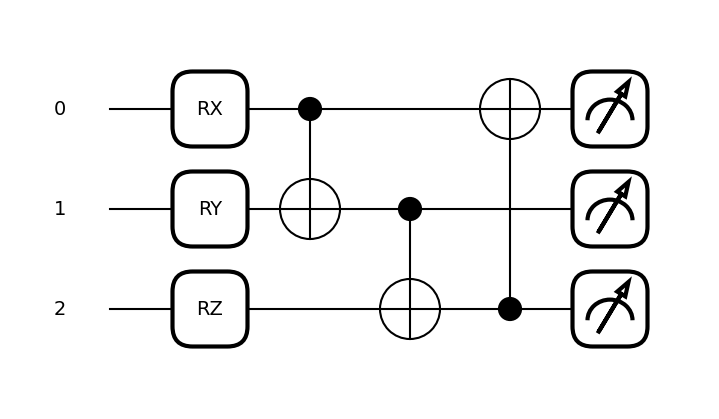

In [19]:
fig, ax = qml.draw_mpl(my_circuit)(0.1,0.2,0.3)
plt.show()